In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()
print(len(df))
df.isnull().sum() #Vérifier s'il manque des données
df.describe()

150


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


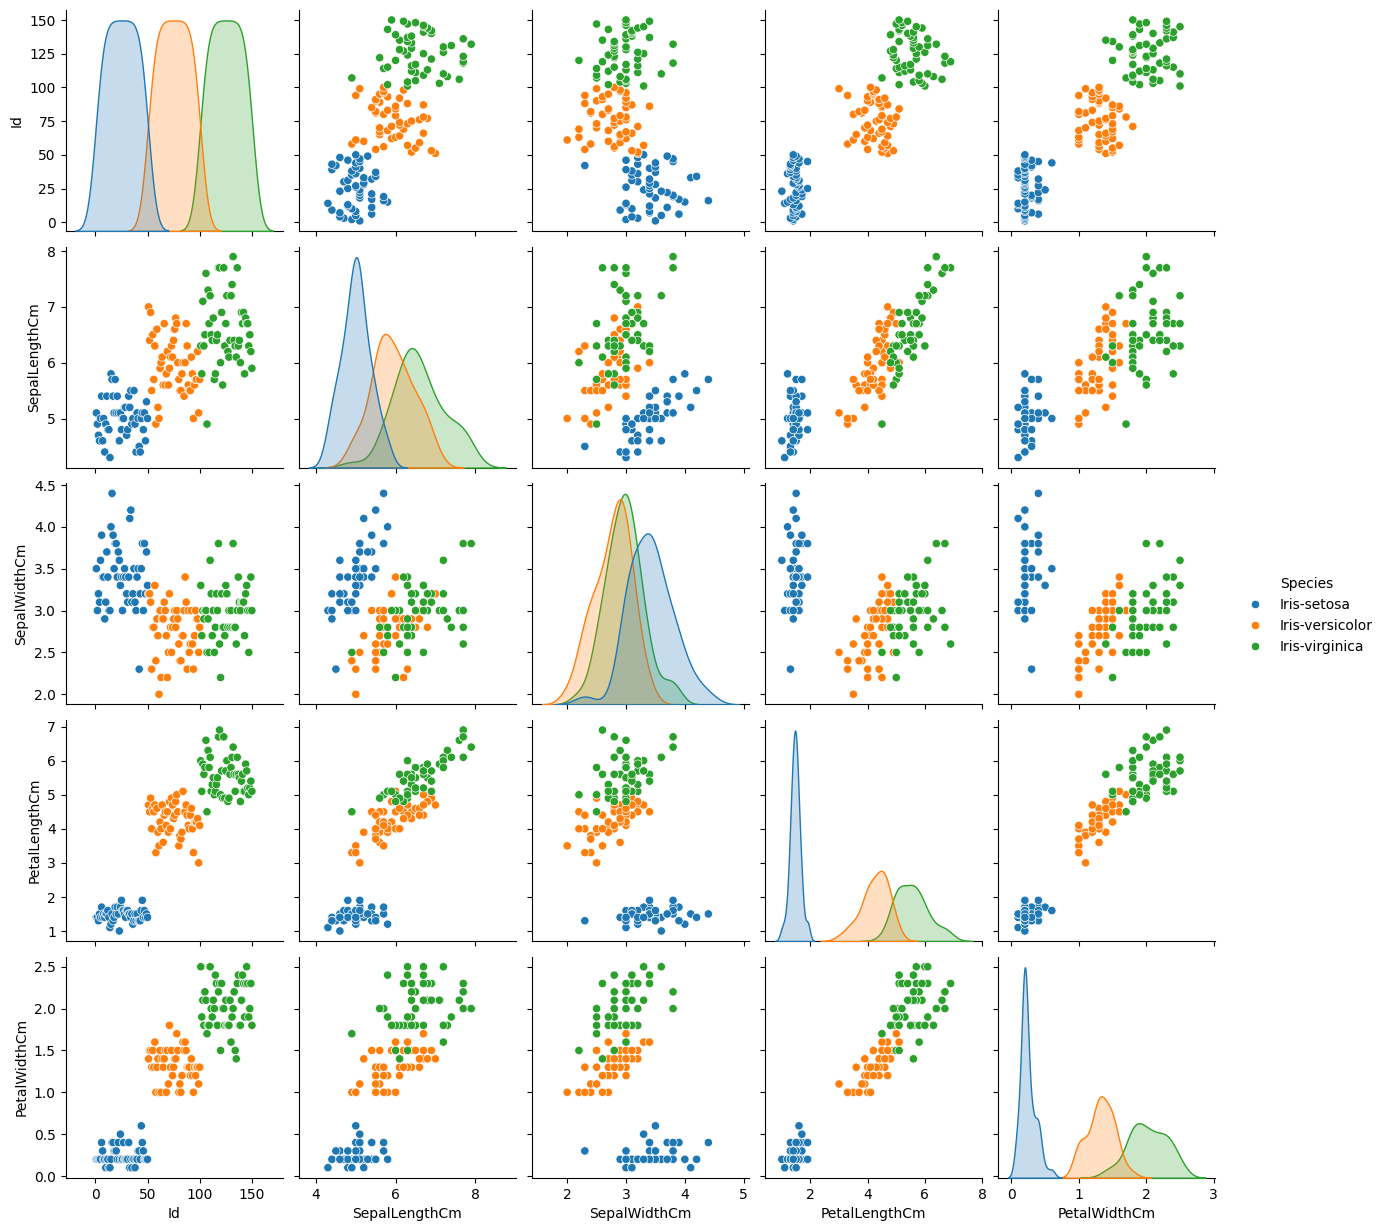

In [4]:
sns.pairplot(df, hue='Species')
plt.show()

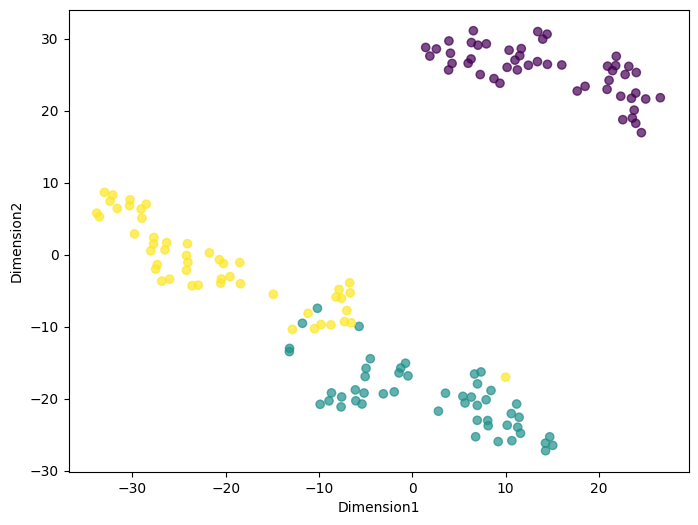

In [5]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
feat_names = df.columns[1:-1]

tsne = TSNE(n_components = 2, perplexity = 10, learning_rate= 100)
X_embedded = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_embedded, columns= ['Dim1','Dim2'])
df_tsne['Class'] = y
df_tsne['Class_code'] = df_tsne['Class'].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.scatter(df_tsne['Dim1'],df_tsne['Dim2'], c = df_tsne['Class_code'], alpha = 0.7)
plt.show()

L'accuracy s'élève à 0.98
[[16  0  0]
 [ 0 14  1]
 [ 0  0 19]]


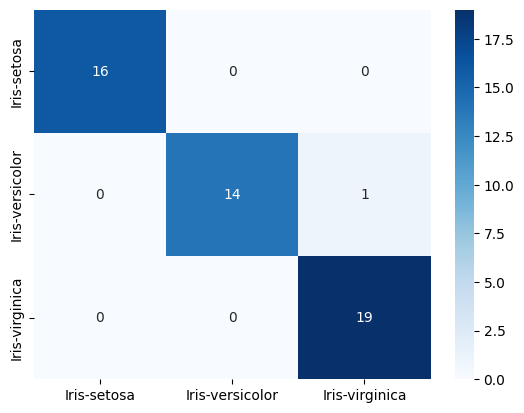

In [6]:
model_lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle= True)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
acc = accuracy_score(y_pred_lr, y_test)
print(f"L'accuracy s'élève à {acc}")
mat_conf_lr = confusion_matrix(y_pred_lr,y_test)
print(mat_conf_lr)
sns.heatmap(mat_conf_lr, annot= True, xticklabels=model_lr.classes_, yticklabels=model_lr.classes_, cmap='Blues')
plt.show()




In [7]:
classification_report(y_test, y_pred_lr, output_dict= True)


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16.0},
 'Iris-versicolor': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14.0},
 'Iris-virginica': {'precision': 1.0,
  'recall': 0.95,
  'f1-score': 0.9743589743589743,
  'support': 20.0},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9777777777777779,
  'recall': 0.9833333333333334,
  'f1-score': 0.9799587385794283,
  'support': 50.0},
 'weighted avg': {'precision': 0.9813333333333333,
  'recall': 0.98,
  'f1-score': 0.9800884173297966,
  'support': 50.0}}

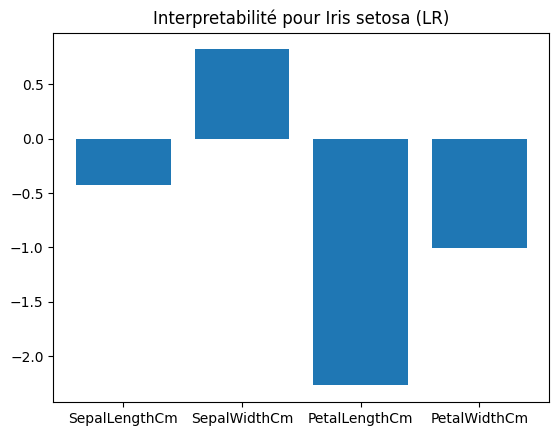

In [8]:
coefficients = model_lr.coef_[0]
plt.bar(feat_names, coefficients)
plt.title("Interpretabilité pour Iris setosa (LR)")
plt.show()

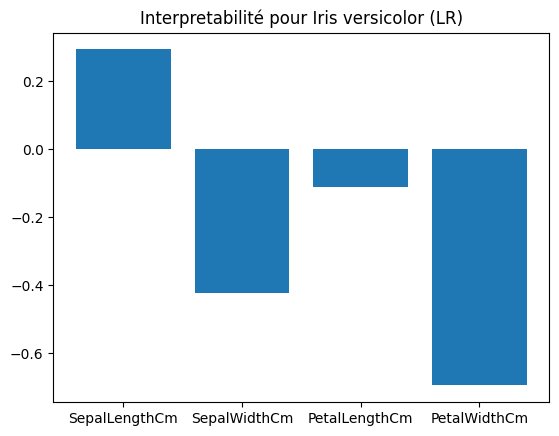

In [9]:
coefficients = model_lr.coef_[1]
plt.bar(feat_names, coefficients)
plt.title("Interpretabilité pour Iris versicolor (LR)")
plt.show()

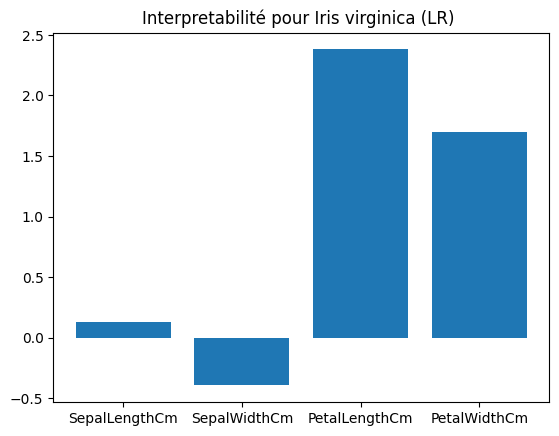

In [10]:
coefficients = model_lr.coef_[2]
plt.bar(feat_names, coefficients)
plt.title("Interpretabilité pour Iris virginica (LR) ")
plt.show()

L'accuracy avec le modèle SVC est 0.98
[[16  0  0]
 [ 0 14  0]
 [ 0  1 19]]


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16.0},
 'Iris-versicolor': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14.0},
 'Iris-virginica': {'precision': 1.0,
  'recall': 0.95,
  'f1-score': 0.9743589743589743,
  'support': 20.0},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9777777777777779,
  'recall': 0.9833333333333334,
  'f1-score': 0.9799587385794283,
  'support': 50.0},
 'weighted avg': {'precision': 0.9813333333333333,
  'recall': 0.98,
  'f1-score': 0.9800884173297966,
  'support': 50.0}}

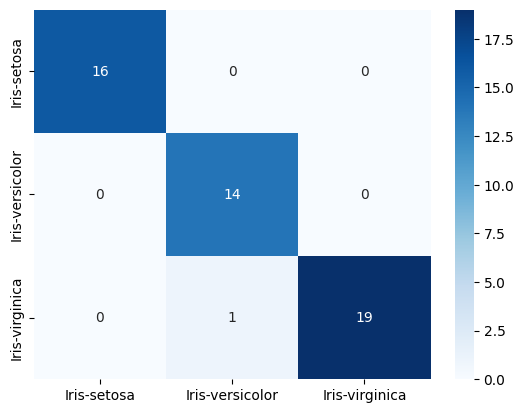

In [11]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred_svc) 
print(f"L'accuracy avec le modèle SVC est {acc_svc}")
mat_conf_svc = confusion_matrix(y_test,y_pred_svc)
print(mat_conf_svc)
sns.heatmap(mat_conf_svc, annot= True, xticklabels=svc.classes_, yticklabels= svc.classes_, cmap='Blues')
plt.plot
classification_report(y_test, y_pred_svc, output_dict= True)

In [12]:
classification_report(y_test, y_pred_svc, output_dict= True)

{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16.0},
 'Iris-versicolor': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14.0},
 'Iris-virginica': {'precision': 1.0,
  'recall': 0.95,
  'f1-score': 0.9743589743589743,
  'support': 20.0},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9777777777777779,
  'recall': 0.9833333333333334,
  'f1-score': 0.9799587385794283,
  'support': 50.0},
 'weighted avg': {'precision': 0.9813333333333333,
  'recall': 0.98,
  'f1-score': 0.9800884173297966,
  'support': 50.0}}

In [13]:
from sklearn.tree import export_text
model_dt = DecisionTreeClassifier(random_state = 42, max_depth = 3)
model_dt.fit(X_train, y_train)

rules = export_text(model_dt, feature_names= feat_names)
print(rules)


|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 5.35
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalLengthCm >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- class: Iris-virginica
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: Iris-virginica



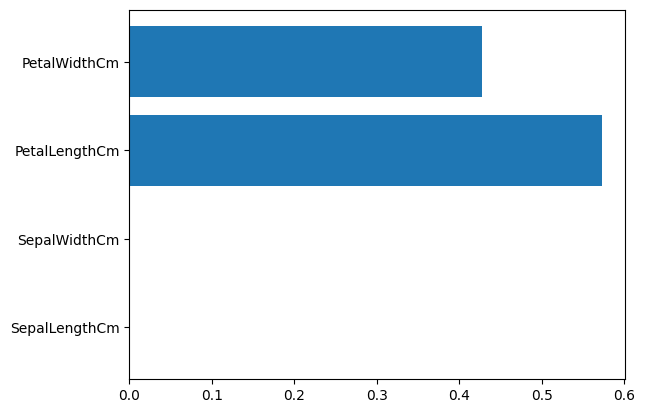

In [14]:
feature_importances = model_dt.feature_importances_
plt.barh(feat_names,feature_importances)
plt.show()

1.0
[[16  0  0]
 [ 0 14  0]
 [ 0  0 20]]


C:\Users\kalai\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

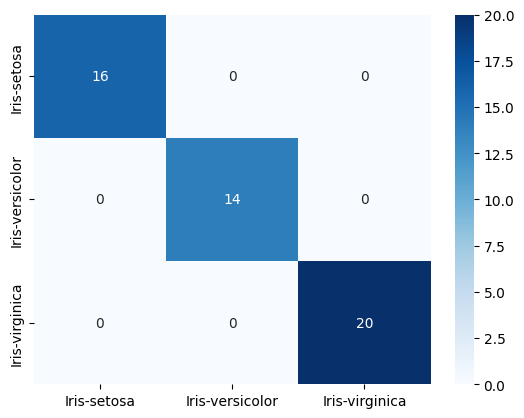

In [15]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(100,), random_state = 1) #accuracy = 0.68 pour 10 neurones (underfitting)
MLP.fit(X_train,y_train)
y_pred_mlp = MLP.predict(X_test)
acc_MLP = accuracy_score(y_test, y_pred_mlp)
print(acc_MLP)
mat_conf_mlp = confusion_matrix(y_test ,y_pred_mlp)
print(mat_conf_mlp)
sns.heatmap(mat_conf_mlp, annot= True, xticklabels= MLP.classes_ ,yticklabels= MLP.classes_ ,cmap = 'Blues')
 #Pour optimiser, il faudrait faire du preprocessing sur les données (StandardScaler(),...)

In [16]:
classification_report(y_test, y_pred_svc, output_dict= True)

{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16.0},
 'Iris-versicolor': {'precision': 0.9333333333333333,
  'recall': 1.0,
  'f1-score': 0.9655172413793104,
  'support': 14.0},
 'Iris-virginica': {'precision': 1.0,
  'recall': 0.95,
  'f1-score': 0.9743589743589743,
  'support': 20.0},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9777777777777779,
  'recall': 0.9833333333333334,
  'f1-score': 0.9799587385794283,
  'support': 50.0},
 'weighted avg': {'precision': 0.9813333333333333,
  'recall': 0.98,
  'f1-score': 0.9800884173297966,
  'support': 50.0}}

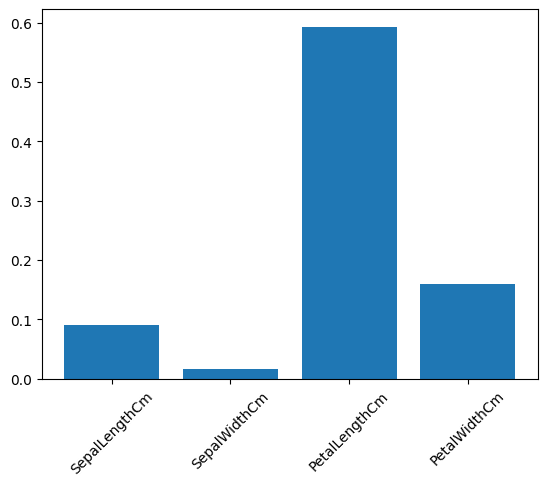

In [17]:
from sklearn.inspection import permutation_importance

resultat = permutation_importance(MLP,X_train, y_train, n_repeats = 10, random_state = 1)
plt.bar(feat_names, resultat.importances_mean)
plt.xticks(rotation = 45)
plt.show()

La hateur des barres indique la baisse de performance du modèle quand la feature est permutée. Ainsi, les caractéristiques les plus importantes pour classifier les iris suivent cet ordre : PetalLengthCm, PetalWidthCm, SepalLengthCm et enfin SepalWidthCm 

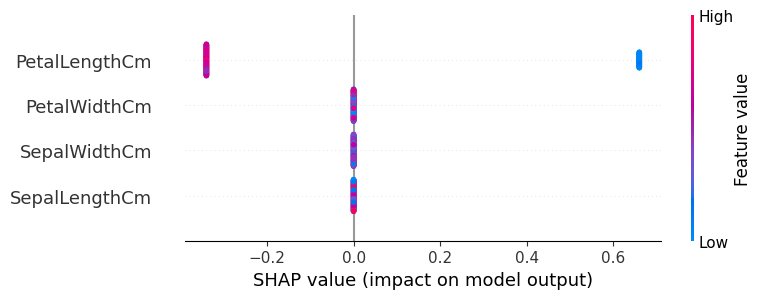

(150, 4)
4
(150, 4, 3)


In [19]:
import shap
import numpy as np
explainer = shap.TreeExplainer(model_dt)

shap_values = explainer.shap_values(X)
mean_abs_shap = np.mean(np.abs(np.array(shap_values)), axis=0)
shap_class0 = shap_values[:, :, 0]  # shape will be (150, 4)

shap.summary_plot(shap_class0, X, feature_names=feat_names)
plt.show()

print(X.shape)
print(len(feat_names))
print(shap_values[0].shape if isinstance(shap_values, list) else shap_values.shape)

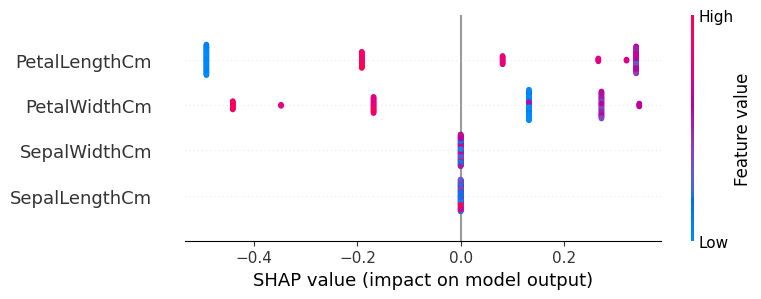

In [20]:
shap_class0 = shap_values[:, :, 1]  # shape will be (150, 4)

shap.summary_plot(shap_class0, X, feature_names=feat_names)
plt.show()

In [21]:
shap_class0 = shap_values[:, :, 2]  # shape will be (150, 4)



In [22]:
print(X[0])
model_lr.predict([X[0]])

[5.1 3.5 1.4 0.2]


array(['Iris-setosa'], dtype=object)

In [23]:
X_new = [[5.1, 3.5, 1.4, 0.2],[3.5,2.1,4.3,2.1] ]
y_new_pred = model_lr.predict(X_new)
print(y_new_pred)

['Iris-setosa' 'Iris-versicolor']


The End